### Small Image Classification Using Convolutional Neural Network (CNN)

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#cifar10 image dataset will load from tensorflow keras datasets
#there has 32*32 RGB images X_
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

###### Here we see there are 50000 training images and 1000 test images

In [ ]:
X_train[0] #this will return a 3D array where the array will be 32,32,3

In [19]:
y_train[:5] #will produce a 2D array 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
#we don't need 2D array of y_train so we will convert it into 1D arrat
#here the 1st dimention is 10000 and to keep it as it is we have to pass -1
#in the 2nd dimention i don't want [6], instead i want only 6 so i will keep it blank
y_train=y_train.reshape(-1,) 

In [22]:
y_train[:5] #now it is 1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

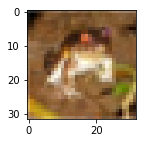

In [12]:
plt.figure(figsize= (15,2)) #this control the size of the image
plt.imshow(X_train[0]) #this will convert the 3D into image

In [15]:
#This function is take x and y as index and printing that particular image sample
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

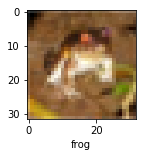

In [24]:
plot_sample(X_train,y_train,0)